In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])

In [3]:
phase1harmonics.shape

(168062, 2998)

In [9]:
phase1harmonics.iloc[100,40]

0.01

In [14]:
phase1harmonics.iloc[:,38:].max()

38      0.075012
39      0.225952
40      0.090027
41      0.173950
42      0.088013
          ...   
2993    0.001000
2994    0.001000
2995    0.001000
2996    0.001000
2997    0.001000
Length: 2960, dtype: float16

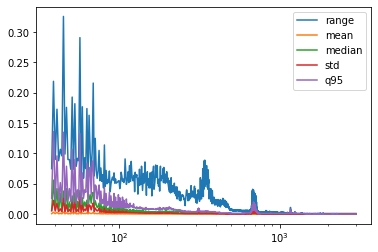

In [29]:
plt.plot((phase1harmonics.iloc[:,38:].max() - phase1harmonics.iloc[:,38:].min()), label="range")
plt.plot(phase1harmonics.iloc[:,38:].mean(), label="mean")
plt.plot(phase1harmonics.iloc[:,38:].median(), label="median")
plt.plot(phase1harmonics.iloc[:,38:].std(), label="std")
plt.plot(phase1harmonics.iloc[:,38:].quantile(0.95), label="q95")
plt.legend()
plt.xscale('log')
plt.show()

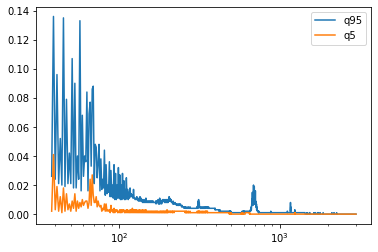

In [30]:
plt.plot(phase1harmonics.iloc[:,38:].quantile(0.95), label="q95")
plt.plot(phase1harmonics.iloc[:,38:].quantile(0.05), label="q5")
plt.legend()
plt.xscale('log')
plt.show()

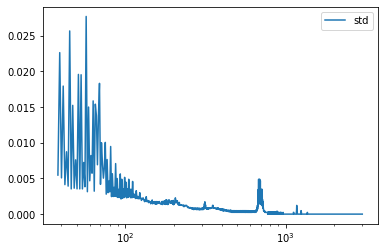

In [31]:
plt.plot(phase1harmonics.iloc[:,38:].std(), label="std")
plt.legend()
plt.xscale('log')
plt.show()

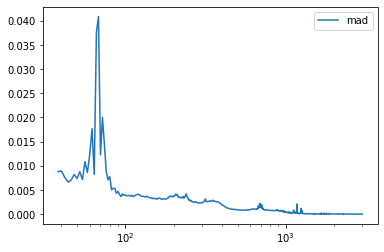

In [38]:
plt.plot(phase1harmonics.iloc[:,38::2].mad(), label="mad")
plt.legend()
plt.xscale('log')
plt.show()

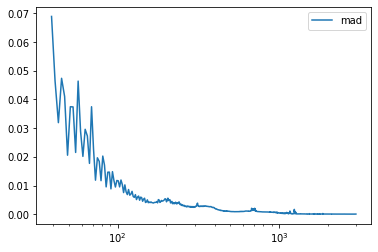

In [39]:
plt.plot(phase1harmonics.iloc[:,39::2].mad(), label="mad")
plt.legend()
plt.xscale('log')
plt.show()

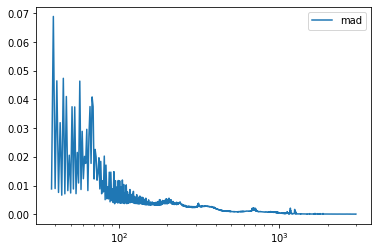

In [49]:
plt.plot(phase1harmonics.iloc[:,38:].mad(), label="mad")
plt.xscale('log')
plt.legend()
plt.show()

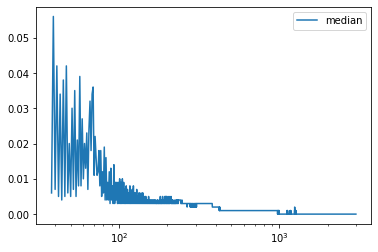

In [42]:
plt.plot(phase1harmonics.iloc[:,38:].median(), label="median")
plt.legend()
plt.xscale('log')
plt.show()

In [33]:
from scipy import stats

C:\Users\Philipp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  This is separate from the ipykernel package so we can avoid doing imports until


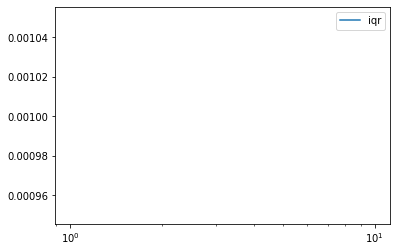

In [36]:
plt.plot(stats.iqr(phase1harmonics.iloc[:,38:], interpolation = 'midpoint'), label="iqr")
plt.legend()
plt.xscale('log')
plt.show()

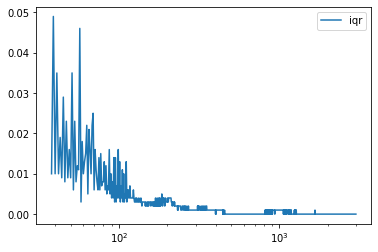

In [37]:
plt.plot((phase1harmonics.iloc[:,38:].quantile(0.75) - phase1harmonics.iloc[:,38:].quantile(0.25)), label="iqr")
plt.legend()
plt.xscale('log')
plt.show()

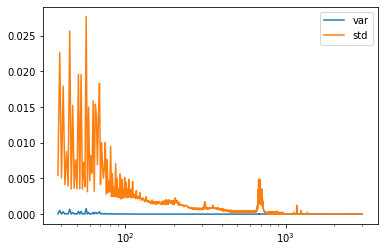

In [48]:
plt.plot(phase1harmonics.iloc[:,38:].var(), label="var")
plt.plot(phase1harmonics.iloc[:,38:].std(), label="std")
plt.legend()
plt.xscale('log')
plt.show()

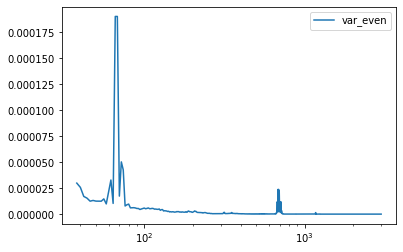

In [46]:
plt.plot(phase1harmonics.iloc[:,38::2].var(), label="var_even")
plt.legend()
plt.xscale('log')
plt.show()

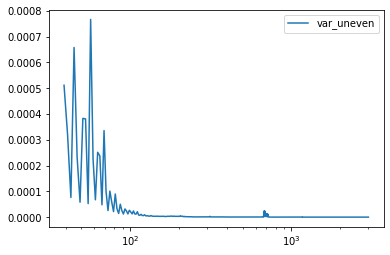

In [47]:
plt.plot(phase1harmonics.iloc[:,39::2].var(), label="var_uneven")
plt.legend()
plt.xscale('log')
plt.show()

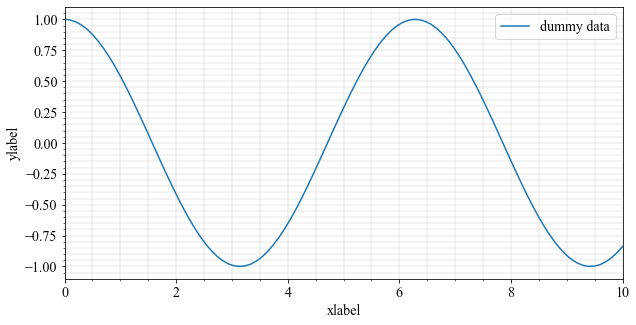

In [1]:
import matplotlib.pyplot as plt 
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] =10,5
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 14}
plt.rc('font', **font)


# dummy data
x = np.linspace(0, 10, 100)
y = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y, label ="dummy data")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("xlabel")
ax.set_ylabel('ylabel')
ax.legend()


In [2]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

In [39]:
generateXAxisData()

array([  2000.,   2050.,   2100., ..., 149850., 149900., 149950.])

In [3]:
import h5py
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:])*230

In [4]:
sh

array([[0.2301, 6.9   , 0.4602, ..., 0.    , 0.    , 0.    ],
       [0.4602, 7.133 , 0.4602, ..., 0.    , 0.    , 0.    ],
       [0.69  , 6.9   , 0.4602, ..., 0.    , 0.    , 0.    ],
       ...,
       [0.2301, 2.99  , 0.4602, ..., 0.    , 0.    , 0.    ],
       [0.2301, 3.45  , 0.4602, ..., 0.    , 0.    , 0.    ],
       [0.    , 3.45  , 0.4602, ..., 0.    , 0.    , 0.    ]],
      dtype=float16)

In [67]:
sh.shape

(168062, 2960)

In [11]:
def toVmydB(harmonics):
    harmonics[harmonics<1e-4] = 1e-4
    Vmydb = 20*np.log10(harmonics/1e-6)
    return Vmydb

In [9]:
log_sh = toVmydB(sh)

C:\Users\Philipp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
log_sh

[array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=float16),
 array([  inf,   inf,   inf, ..., 39.88, 39.88, 39.88], dtype=fl

In [71]:
log_sh.mean(axis=0)

array([  inf,   inf,   inf, ..., 39.97, 39.97, 39.97], dtype=float16)

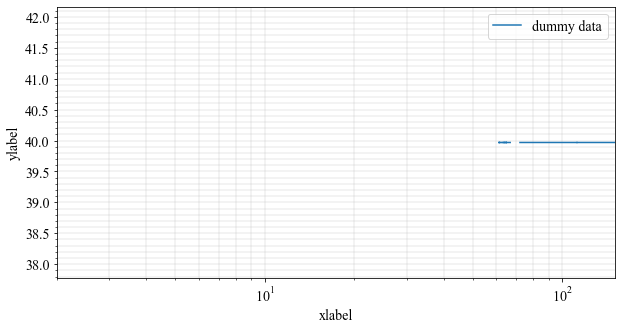

In [72]:
x = generateXAxisData()/1000
y = log_sh.mean(axis=0)

fig, ax = plt.subplots()

ax.plot(x, y, label ="dummy data")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("xlabel")
ax.set_ylabel('ylabel')
ax.set_xscale('log')
ax.legend()